<a href="https://colab.research.google.com/github/Deepeck05/Artificial_Inteligence_Project/blob/main/Project_spam_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
email_data=pd.read_csv("spam_ham_dataset.csv")

In [8]:
email_data.head(20)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [9]:
email_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
email_data.info()
email_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6140 non-null   int64 
 1   label       6140 non-null   object
 2   text        6140 non-null   object
 3   label_num   6140 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 192.0+ KB


,Unnamed: 0,label,text,label_num
count,6140.000000,6140,6140,6140.000000
unique,NaN,2,4994,NaN
top,NaN,ham,Subject: calpine daily gas nomination\r\n>\r\n...,NaN
freq,NaN,4340,24,NaN
mean,2588.636645,NaN,NaN,0.292997
std,1499.105138,NaN,NaN,0.455174
min,0.000000,NaN,NaN,0.000000
25%,1287.750000,NaN,NaN,0.000000
50%,2581.500000,NaN,NaN,0.000000
75%,3896.250000,NaN,NaN,1.000000


In [11]:
email_data.isna().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [12]:
email_data.duplicated().sum()

np.int64(968)

In [29]:
email_data[email_data['label']=='spam'][['label','text']].head()

,label,text
3,spam,"Subject: photoshop , windows , office . cheap ..."
7,spam,Subject: looking for medication ? we ` re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...


In [19]:
email_data[email_data['label']=='spam'].count()

,0
Unnamed: 0,1499
label,1499
text,1499
label_num,1499


In [20]:
email_data[email_data['label']=='ham'].count()

,0
Unnamed: 0,3672
label,3672
text,3672
label_num,3672


In [14]:
#X_label and Y_lable creation
X = email_data.drop(columns='label_num',axis=1)
Y = email_data['label_num']

In [15]:
#Splitting the for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [16]:
#Thus In this dataset we have to convert the text to numeric.
## So, we have to import vectorizerclass from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

X_train_vect = vect.fit_transform(X_train['text'])
X_test_vect = vect.transform(X_test['text'])
#assinging o xtrain and xtest
X_train = X_train_vect
X_test = X_test_vect

In [18]:
#train the logistic regression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
prediction=model.predict(X_test)
y_pred=model.predict_proba(X_test)
print(prediction)

[0 0 0 ... 1 0 0]


In [20]:
y_pred

array([[0.8530959 , 0.1469041 ],
       [0.97395006, 0.02604994],
       [0.97360104, 0.02639896],
       ...,
       [0.26277674, 0.73722326],
       [0.99740191, 0.00259809],
       [0.99860876, 0.00139124]])

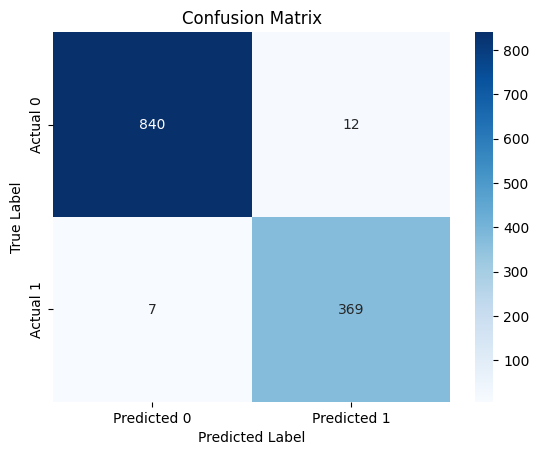

In [21]:
# Visualize the confusion matrix
con_mtrx = confusion_matrix(Y_test, prediction)
sns.heatmap(con_mtrx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)

0.9845276872964169


In [24]:
print("Accuracy:", accuracy_score(Y_test, prediction))
print("Confusion Matrix",con_mtrx)

Accuracy: 0.9845276872964169
Confusion Matrix [[840  12]
 [  7 369]]


In [25]:
classification_report=classification_report(Y_test,prediction)
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       852
           1       0.97      0.98      0.97       376

    accuracy                           0.98      1228
   macro avg       0.98      0.98      0.98      1228
weighted avg       0.98      0.98      0.98      1228

